# 0. Setup Paths

In [43]:
import os
import tensorflow as tf

In [44]:
pwd

'C:\\Users\\maz\\dev\\Projects_\\DEEPLEARNING_COMPUTERVISION\\2-ANPRandEasyOCR'

In [45]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord_edited_for_kaggle_Dataset.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
TRAINING_STEPS = 100000

In [46]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
    }

In [47]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [48]:
files

{'PIPELINE_CONFIG': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow\\scripts\\generate_tfrecord_edited_for_kaggle_Dataset.py',
 'LABELMAP': 'Tensorflow\\workspace\\annotations\\label_map.pbtxt'}

In [49]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [50]:
paths

{'WORKSPACE_PATH': 'Tensorflow\\workspace',
 'SCRIPTS_PATH': 'Tensorflow\\scripts',
 'APIMODEL_PATH': 'Tensorflow\\models',
 'ANNOTATION_PATH': 'Tensorflow\\workspace\\annotations',
 'IMAGE_PATH': 'Tensorflow\\workspace\\images',
 'MODEL_PATH': 'Tensorflow\\workspace\\models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow\\workspace\\pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet',
 'OUTPUT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\export',
 'TFJS_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\tfjsexport',
 'TFLITE_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\tfliteexport',
 'PROTOC_PATH': 'Tensorflow\\protoc'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [51]:
# https://www.tensorflow.org/install/source_windows

In [52]:
# if os.name=='nt':
#     !pip install wget
#     import wget

In [53]:
# if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
#     !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [54]:
# # Install Tensorflow Object Detection 
# if os.name=='posix':  
#     !apt-get install protobuf-compiler
#     !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
# if os.name=='nt':
#     #url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
#     url="https://github.com/protocolbuffers/protobuf/releases/download/v3.19.6/protoc-3.19.6-win64.zip"
#     wget.download(url)
#     #!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
#     !move protoc-3.19.6-win64.zip {paths['PROTOC_PATH']}
#     #!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
#     !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.19.6-win64.zip
#     os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
#     !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
#     !cd Tensorflow/models/research/slim && pip install -e . 

In [55]:
# VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# # Verify Installation
# !python {VERIFICATION_SCRIPT}

In [56]:
# if you don't see 'OK (skipped=1)' thing in above cell then you must be encountered with errors
# just simply uninstall and re-install packages which are shown in the errors

# pip uninstall protobuf matplotlib -y
# pip install protobuf matplotlib==3.2.2
#!pip install tensorflow-gpu --upgrade
#!pip uninstall protobuf matplotlib -y
#!pip install protobuf matplotlib
#!pip install Pillow
#!pip install pyyaml==5.3.1

In [57]:
import object_detection

In [58]:
# if os.name =='posix':
#     !wget {PRETRAINED_MODEL_URL}
#     !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#     !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
# if os.name == 'nt':
#     wget.download(PRETRAINED_MODEL_URL)
#     !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#     !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

# 2. Create Label Map

In [59]:
files['LABELMAP']

'Tensorflow\\workspace\\annotations\\label_map.pbtxt'

In [60]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Move/Copy some images

In [61]:
# OPTIONAL IF RUNNING ON COLAB --> Move archive.tar file in 'Tensorflow/workspace/images' folder or 'IMAGE_PATH'
# if running localy --> Move 'test' and 'train' folder in 'Tensorflow/workspace/images' folder or 'IMAGE_PATH'
# ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
# if os.path.exists(ARCHIVE_FILES):
#   !tar -zxvf {ARCHIVE_FILES}

# 4. (Optional) Evaluate the Model

In [66]:
# TRAINING_SCRIPT = "Tensorflow/models/research/object_detection/model_main_tf2.py"
# print(TRAINING_SCRIPT)               
# print(paths['CHECKPOINT_PATH'])      
# print(files['PIPELINE_CONFIG'])
# paths['CHECKPOINT_PATH']

In [67]:
# command = "python {} \
# --model_dir={} \
# --pipeline_config_path={} \
# --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [68]:
#print(command)

In [69]:
#!{command}

# 5. Load Train Model From Checkpoint

In [24]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [166]:
files['PIPELINE_CONFIG']

'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config'

In [26]:
paths['CHECKPOINT_PATH']

'Tensorflow\\workspace\\models\\my_ssd_mobnet'

In [169]:
#configs

In [25]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-101')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 6. Detect from an Image

In [27]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

In [28]:
files['LABELMAP']

'Tensorflow\\workspace\\annotations\\label_map.pbtxt'

In [29]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [30]:
category_index

{1: {'id': 1, 'name': 'licence'}}

In [31]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars105.png')

In [32]:
MAX_BOXES_TO_DRAW = 5
MIN_SCORE_THRES = 0.6

In [33]:
def detect_func(img, MAX_BOXES_TO_DRAW, MIN_SCORE_THRES):
  image_np = np.array(img)

  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
  detections = detect_fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  # detection_classes should be ints.
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
              image_np_with_detections,
              detections['detection_boxes'],
              detections['detection_classes']+label_id_offset,
              detections['detection_scores'],
              category_index,
              use_normalized_coordinates=True,
              max_boxes_to_draw=MAX_BOXES_TO_DRAW,
              min_score_thresh=MIN_SCORE_THRES,
              agnostic_mode=False)
  
  return image_np_with_detections

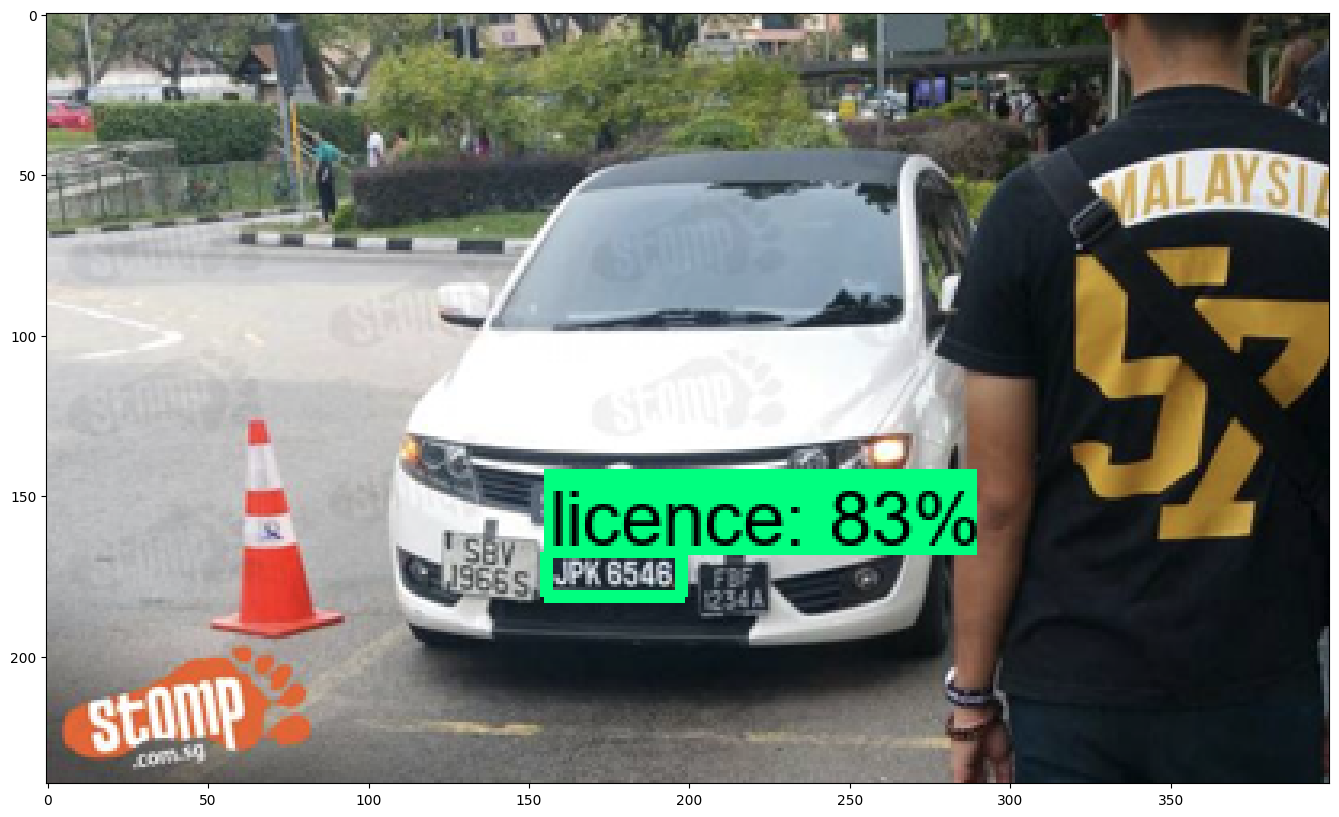

In [34]:
rcParams['figure.figsize'] = 20, 10
img = cv2.imread(IMAGE_PATH)

image_np_with_detections = detect_func(img, MAX_BOXES_TO_DRAW, MIN_SCORE_THRES)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
# Some Random Images

In [36]:
testImagesPath = []
for root, dirs, files in os.walk(os.path.join(paths['IMAGE_PATH'], 'test')):
    for filename in files:
        if filename.find(".xml") == -1:
          testImagesPath.append(f"{root}/{filename}")

#testImagesPath

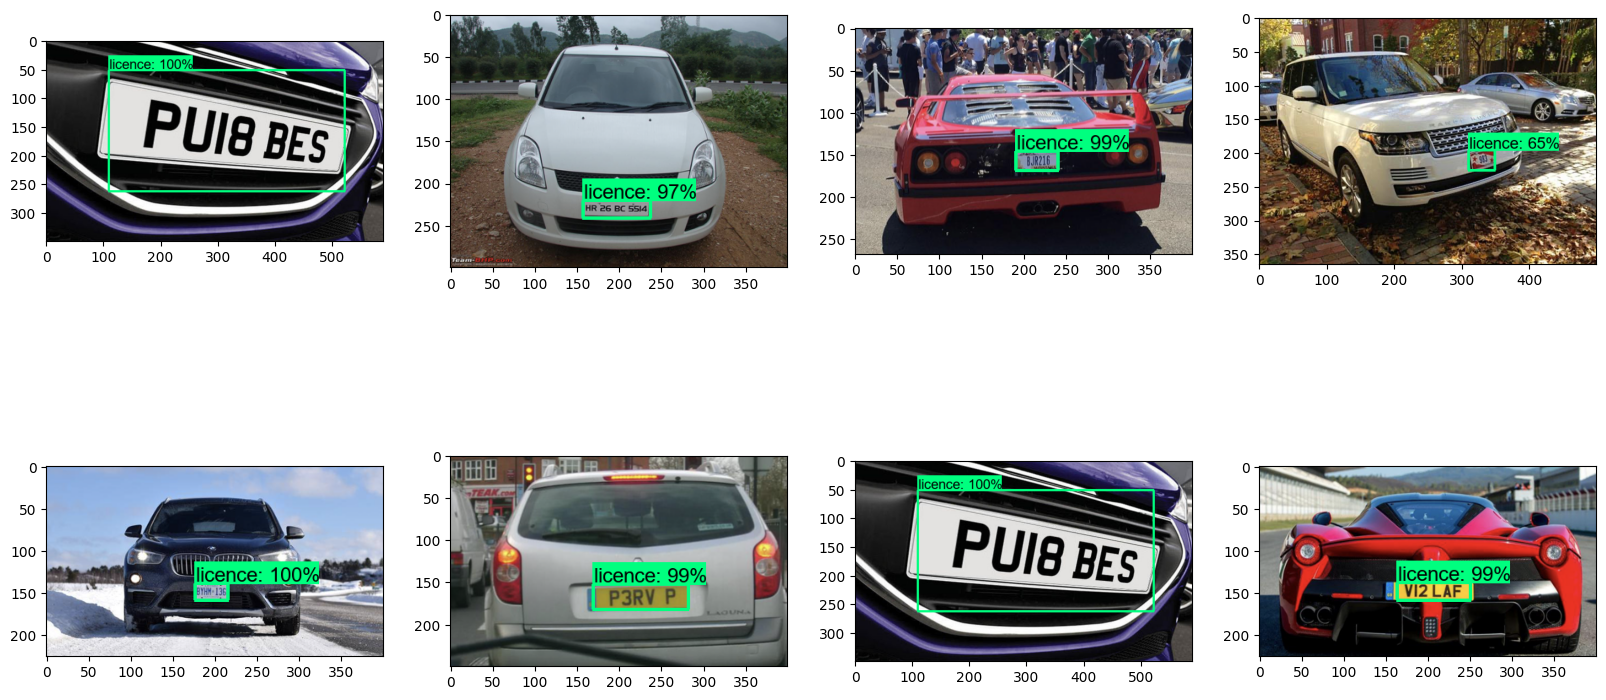

In [37]:
#Some random images to display at a time along with their true and random labels
rcParams['figure.figsize'] = 20, 10

num_row = 2
num_col = 4

imageId = np.random.randint(0, len(testImagesPath), num_row * num_col)

fig, axes = plt.subplots(num_row, num_col)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col) + j

        img = cv2.imread(testImagesPath[imageId[k]])
        
        image_np_with_detections = detect_func(img, MAX_BOXES_TO_DRAW, MIN_SCORE_THRES)

        axes[i,j].imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
        # axes[i,j].set_title("", fontsize=14)
        #axes[i,j].axis('off')
        #fig.suptitle("", fontsize = 18) 

plt.show()

# 7. Real Time Detections from your Webcam (Local)

In [38]:
#!pip uninstall opencv-python-headless -y

In [39]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 8. Prevent GPU complete consumption

* EasyOCR is build on PyTorch so it is required to split GPU to give both Tensorflow and PyTorch some memory to run.

In [70]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: 
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

# 9. EasyOCR

* https://github.com/JaidedAI/EasyOCR
* Optical Character Recognition gives us the ability to extract text from regions of interest.

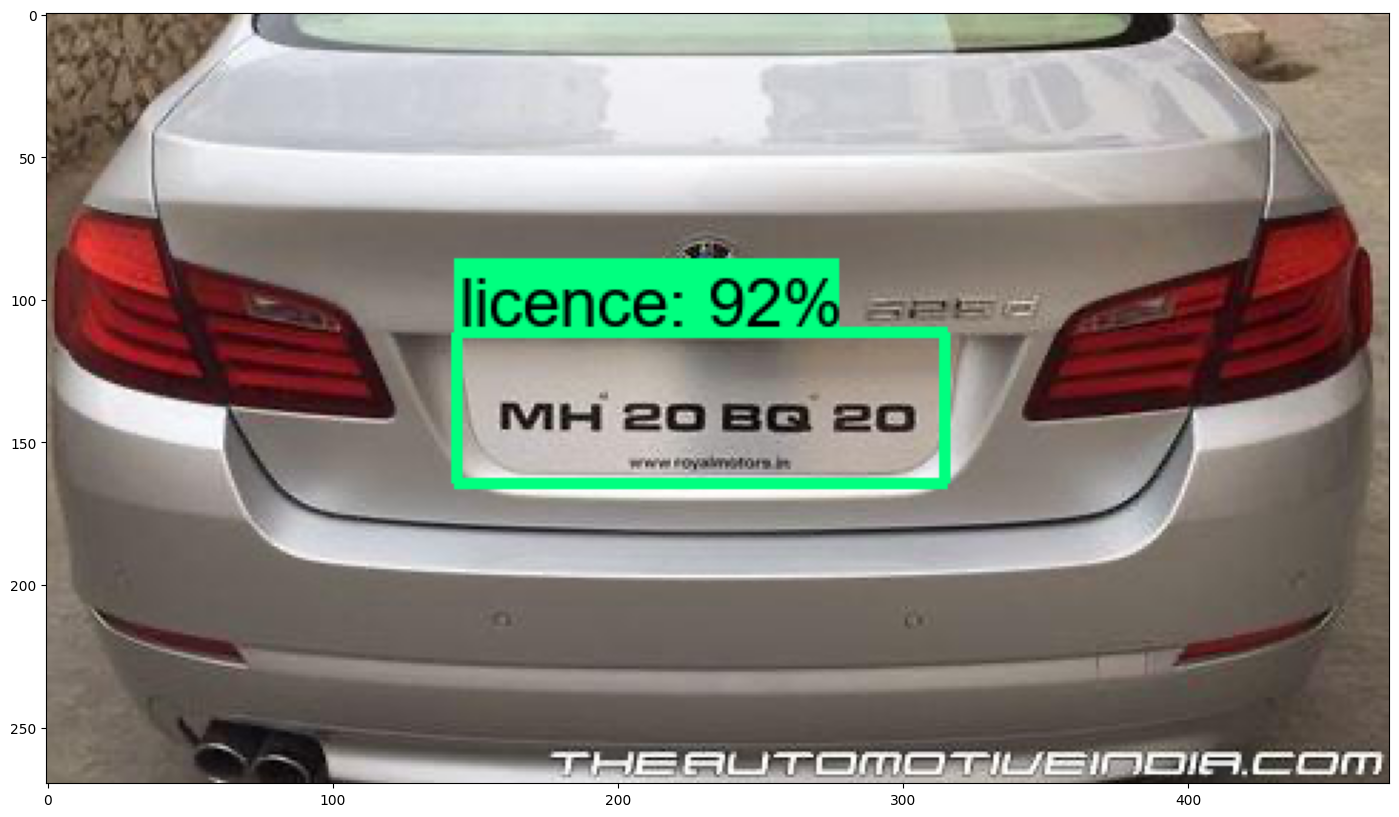

In [118]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

MAX_BOXES_TO_DRAW = 5
MIN_SCORE_THRES = 0.6

category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars107.png')

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=MAX_BOXES_TO_DRAW,
            min_score_thresh=MIN_SCORE_THRES,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()


In [119]:
for i in detections.keys():
    print(i)

detection_boxes
detection_scores
detection_classes
raw_detection_boxes
raw_detection_scores
detection_multiclass_scores
detection_anchor_indices
num_detections


# Apply OCR to Detections

In [120]:
#!pip install easyocr

In [121]:
# For GPU
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [122]:
import easyocr

In [123]:
detection_threshold = 0.7

In [124]:
image = image_np_with_detections
scores = list(filter(lambda x: x > detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [125]:
width = image.shape[1]
height = image.shape[0]

In [126]:
print(width)
print(height)

471
270


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.4181236  0.3039221  0.60961425 0.67065716]
[112.89337277 143.14730296 164.59584832 315.87952137]
[([[15, 21], [163, 21], [163, 39], [15, 39]], 'MH2080 20', 0.5794915182211885)]


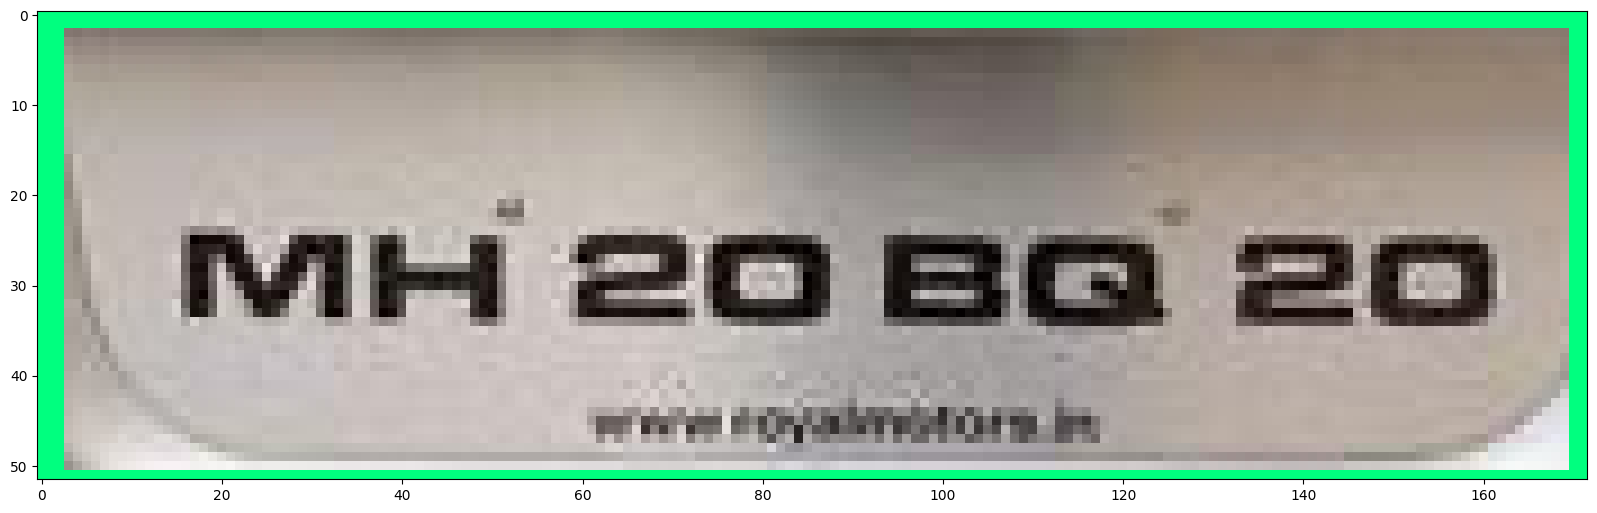

In [127]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [128]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

18
MH2080 20


# OCR Filtering

In [144]:
region_threshold = 0.05

In [145]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [146]:
filter_text(region, ocr_result, region_threshold)

['MH2080 20']

# Bring it Together

In [150]:
region_threshold = 0.05

In [151]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


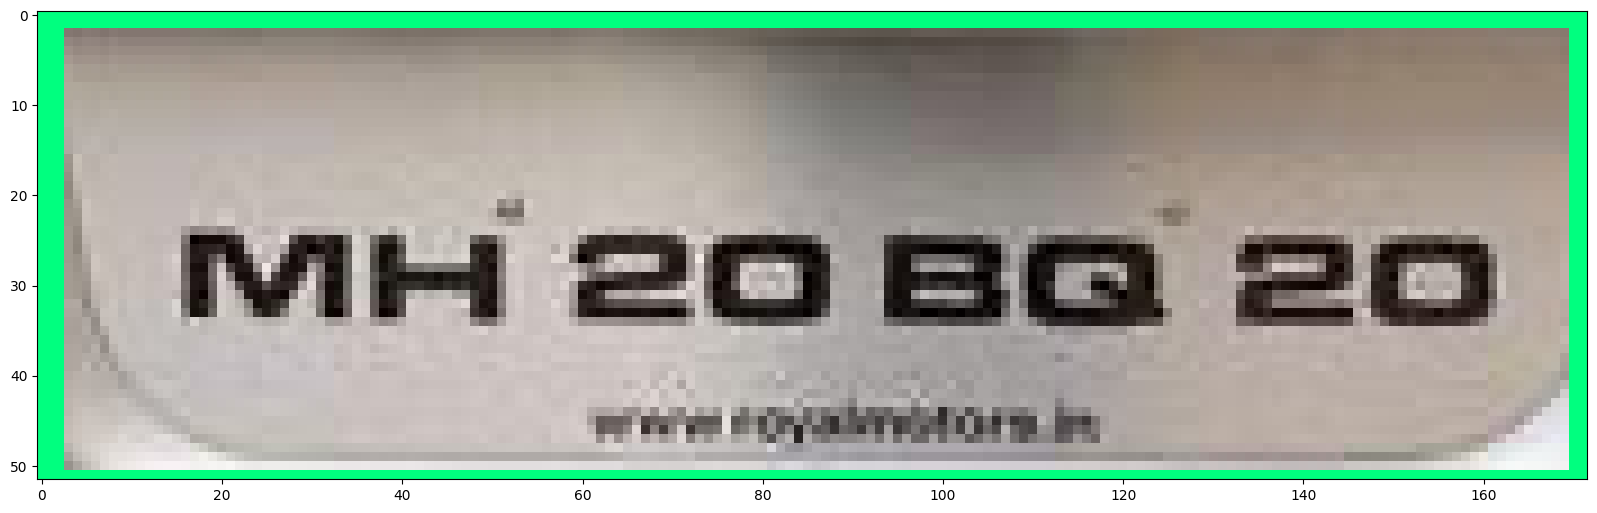

['MH2080 20']


In [152]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

# Save Results

In [153]:
import csv
import uuid

In [154]:
'{}.jpg'.format(uuid.uuid1())

'9fa03af0-5f91-11ed-8cd4-3cf862995f15.jpg'

In [162]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [163]:
#region

In [164]:
save_results(text, region, 'DetectionFromImages.csv', 'Detection_From_Images')

# 10. Real Time Detections from Webcam

In [ ]:
#!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'RealTime.csv', 'RealTime')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break